In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

## データの確認

In [2]:
df = pd.read_csv('dataset/questionnaire_sample.csv')
df

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
0,46,M,48,A,4,6,8,7,8,5,3,7,3,7
1,98,M,43,A,5,5,6,9,7,10,8,5,4,10
2,20,M,55,B,8,8,6,3,8,4,7,6,7,8
3,55,M,54,B,3,4,5,8,6,2,6,2,8,5
4,96,M,53,B,7,10,8,10,2,1,5,2,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,F,29,E,3,3,8,2,4,4,5,3,4,6
96,16,F,28,E,3,3,4,1,4,2,6,9,3,1
97,73,F,27,E,2,5,3,2,7,4,1,3,10,8
98,41,F,26,E,9,9,3,5,2,8,6,2,7,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      100 non-null    int64 
 1   gender  100 non-null    object
 2   age     100 non-null    int64 
 3   job     100 non-null    object
 4   SA1     100 non-null    int64 
 5   SA2     100 non-null    int64 
 6   SA3     100 non-null    int64 
 7   SA4     100 non-null    int64 
 8   SA5     100 non-null    int64 
 9   SA6     100 non-null    int64 
 10  SA7     100 non-null    int64 
 11  SA8     100 non-null    int64 
 12  SA9     100 non-null    int64 
 13  SA10    100 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 11.1+ KB


In [4]:
df.describe(include='all')

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
count,100.000000,100,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
unique,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,54,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,39.650000,NaN,4.250000,6.620000,5.500000,5.800000,5.500000,5.570000,5.420000,5.140000,5.48000,6.120000
std,29.011492,NaN,11.469217,NaN,2.226448,2.673401,2.418364,3.061656,2.826641,2.982288,2.875111,2.810586,2.89716,2.885981
min,1.000000,NaN,20.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,25.750000,NaN,29.000000,NaN,3.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,50.500000,NaN,41.000000,NaN,4.000000,7.000000,5.500000,6.000000,6.000000,6.000000,6.000000,5.000000,5.50000,7.000000
75%,75.250000,NaN,50.000000,NaN,6.000000,9.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.00000,9.000000


## データのvisualization

(array([ 8., 11., 11.,  9.,  7., 13., 11., 10., 13.,  7.]),
 array([20. , 23.9, 27.8, 31.7, 35.6, 39.5, 43.4, 47.3, 51.2, 55.1, 59. ]),
 <BarContainer object of 10 artists>)

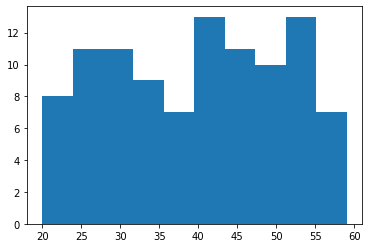

In [5]:
plt.hist(df['age'],bins=10)

## 層別分析

### 効果量を出力する

In [6]:
from numpy import std, mean, sqrt

In [7]:
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return abs(mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

### レポーティングのための関数を定義

In [8]:
def my_report(xa, xb):
    repo = []
    t, p = stats.ttest_ind(xa, xb, equal_var=False)
    MU = xa.mean() - xb.mean()
    Cd = cohen_d(xa, xb)
    repo.append(xa.mean())
    repo.append(xb.mean())
    repo.append(MU)
    repo.append(p)
    str1 = ''
    str2 = ''
    
    if p < 0.001:
        str1 = '***'
    elif p < 0.01:
        str1 = '**'
    elif p < 0.05:
        str1 = '*'
    elif p < 0.1:
        str1 = '†'
        
    if Cd > 0.8:
        str2 = 'Large'
    elif Cd > 0.5:
        str2 = 'Medium'
    elif Cd > 0.2:
        str2 = 'Small'
    else:
        str2 = 'Very Small'
        
    repo.append(str1)
    repo.append(Cd)
    repo.append(str2)
    
    return (repo)

## 性別の分析

In [9]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [10]:
u = df['gender'].nunique()
u

2

In [11]:
convert_gender ={
    'M':0,
    'F':1
}

In [12]:
df['gender'] = df['gender'].map(convert_gender)
df

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
0,46,0,48,A,4,6,8,7,8,5,3,7,3,7
1,98,0,43,A,5,5,6,9,7,10,8,5,4,10
2,20,0,55,B,8,8,6,3,8,4,7,6,7,8
3,55,0,54,B,3,4,5,8,6,2,6,2,8,5
4,96,0,53,B,7,10,8,10,2,1,5,2,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,1,29,E,3,3,8,2,4,4,5,3,4,6
96,16,1,28,E,3,3,4,1,4,2,6,9,3,1
97,73,1,27,E,2,5,3,2,7,4,1,3,10,8
98,41,1,26,E,9,9,3,5,2,8,6,2,7,2


### レポート形式の定義

In [14]:
pre_list = [j for j in range(0, u)]
df_repo = pd.DataFrame(columns=['ave','ave_other','ave_diff','pval','s/ns','d','d_eval'],index = pre_list)
df_repo

,ave,ave_other,ave_diff,pval,s/ns,d,d_eval
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for j in range(0, u):
    Col1 = df['gender'].name
    Col2 = df['SA1'].name
    xa = df[df[Col1] == j][Col2]
    xb = df[df[Col1] != j][Col2]
    df_repo.iloc[j,:] = my_report(xa, xb)
df_repo

,ave,ave_other,ave_diff,pval,s/ns,d,d_eval
0,4.043478,4.425926,-0.382448,0.38766,,0.171541,Very Small
1,4.425926,4.043478,0.382448,0.38766,,0.171541,Very Small
